<a href="https://colab.research.google.com/github/Vixuz144/MN1/blob/main/Ejercicios_Newton_Diferencias_Divididas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
import pandas as pd

In [ ]:
t = sp.Symbol('t')

In [ ]:
def NDD(X, Y, x = t, dec = 5):
  F = np.ones_like(Y) * Y
  n = len(X)

  M = np.concatenate((np.transpose([X]),np.transpose([Y]),np.zeros((n,n-1))),1)
  p = Y[0] * 1

  for i in range(n-1):
    m = len(F)
    L = []
    for j in range(1,m):
      a = (F[j]- F[j-1])/(X[i+j]-X[j-1])
      L.append(a)
      M[j+i,i+2] = a
    F = np.array(L)

    s = 1
    for j in range(i+1):
      a = x-np.round(X[j], dec)
      s *= a
    p += np.round(F[0], dec)*s

  t = ['X', 'Y']
  for i in range(1,n):
    comas = ','*i
    t.append(f'f({comas})')

  T = pd.DataFrame(np.round(M, dec), columns=t)
  return T, p

In [ ]:
X = np.array([1.82, 2.50, 3.65, 4.03])
Y = np.array([0, 1.3, 3.1, 2.52])
a, b = NDD(X, Y, dec = 7)
print(a, '\n')
print(b)

      X     Y      f(,)    f(,,)    f(,,,)
0  1.82  0.00  0.000000  0.00000  0.000000
1  2.50  1.30  1.911765  0.00000  0.000000
2  3.65  3.10  1.565217 -0.18937  0.000000
3  4.03  2.52 -1.526316 -2.02061 -0.828615 

1.9117647*t - 0.8286153*(t - 3.65)*(t - 2.5)*(t - 1.82) - 0.1893701*(t - 2.5)*(t - 1.82) - 3.479411754


In [ ]:
print(sp.expand(b),'=',b.subs(t,1))

-0.8286153*t**3 + 6.414693841*t**2 - 14.1059621334*t + 9.42018288575 = 0.900299293350000


In [ ]:
X = [1.0, 1.3, 1.6, 1.9, 2.2]
Y = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
a, b = NDD(X, Y, dec = 10)
print(a, '\n')
print(b)
print(b.subs(t,1.5))

     X         Y      f(,)     f(,,)    f(,,,)   f(,,,,)
0  1.0  0.765198  0.000000  0.000000  0.000000  0.000000
1  1.3  0.620086 -0.483706  0.000000  0.000000  0.000000
2  1.6  0.455402 -0.548946 -0.108734  0.000000  0.000000
3  1.9  0.281819 -0.578612 -0.049443  0.065878  0.000000
4  2.2  0.110362 -0.571521  0.011818  0.068069  0.001825 

-0.4837056667*t + 0.0018251029*(t - 1.9)*(t - 1.6)*(t - 1.3)*(t - 1.0) + 0.0658783951*(t - 1.6)*(t - 1.3)*(t - 1.0) - 0.1087338889*(t - 1.3)*(t - 1.0) + 1.2489033667
0.511819994220600


     X     Y   f(,)       f(,,)      f(,,,)
0 -0.1  5.30   0.00    0.000000    0.000000
1  0.0  2.00 -33.00    0.000000    0.000000
2  0.2  3.19   5.95  129.833333    0.000000
3  0.3  1.00 -21.90  -92.833333 -556.666667 

-556.6666666667*t*(t - 0.2)*(t + 0.1) + 129.8333333333*t*(t + 0.1) - 33.0*t + 2.0
2.67499999999694


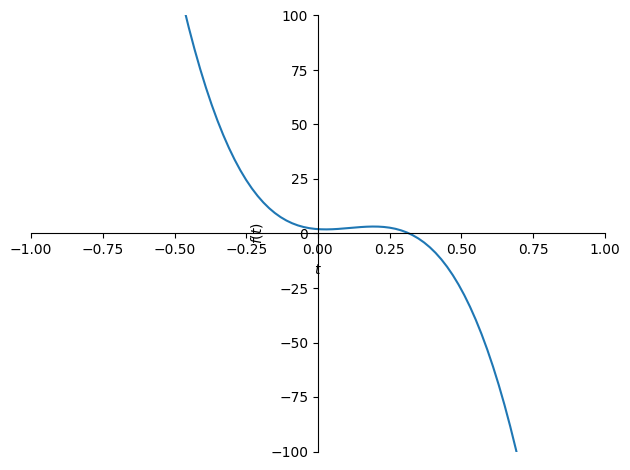

In [ ]:
#134 784

X = [-0.1, 0.0, 0.2, 0.3]
Y = [5.3, 2, 3.19, 1]

a, b = NDD(X, Y, dec = 10)
print(a, '\n')
print(b)
# print(sp.expand(b))
print(b.subs(t,0.25))
sp.plot(b, xlim=(-1,1), ylim=(-100,100))

     X     Y  f(,)  f(,,)  f(,,,)  f(,,,,)  f(,,,,,)
0 -2.0   1.0   0.0    0.0     0.0      0.0       0.0
1 -1.0   4.0   3.0    0.0     0.0      0.0       0.0
2  0.0  11.0   7.0    2.0     0.0      0.0       0.0
3  1.0  16.0   5.0   -1.0    -1.0      0.0       0.0
4  2.0  13.0  -3.0   -4.0    -1.0      0.0       0.0
5  3.0  -4.0 -17.0   -7.0    -1.0      0.0       0.0 

-1.0*t*(t + 1)*(t + 2) + 3.0*t + 2.0*(t + 1)*(t + 2) + 7.0
12.6718750000000


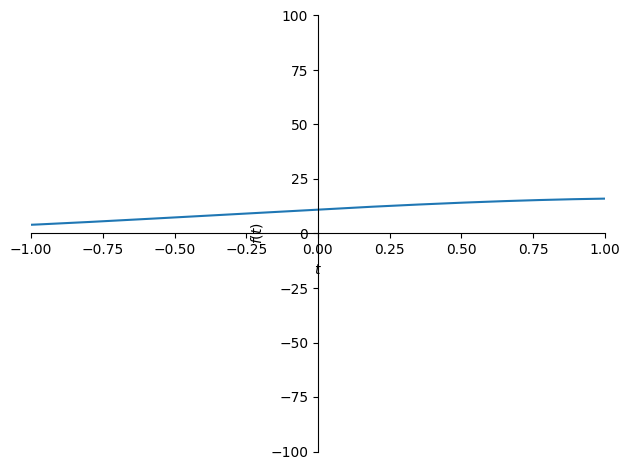

In [ ]:
X = [-2, -1, 0, 1, 2, 3]
Y = [1, 4, 11, 16, 13, -4]

a, b = NDD(X, Y, dec = 10)
print(a, '\n')
print(b)
# print(sp.expand(b))
print(b.subs(t,0.25))
sp.plot(b, xlim=(-1,1), ylim=(-100,100))

In [ ]:
X = [1.3, ]